# Autoencoders using Keras

This workbook demonstrates how to use autoencoders as a feature extraction technique. 

The workbook uses numerical data

In [ ]:
# imports
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten

In [ ]:
# preparation of the data
# in this example, we will use an autogenerated data 
# which we can just create 
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [ ]:
# now, we create the encoder part

# number of input columns
n_inputs = X.shape[1]

# the first layer - the visible one
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [ ]:
# here is the interesting part - the bottleneck
# in this case, the bottleneck has the same shape as the input, 
# so, it's not really a bottleneck
# but has the same function
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
# and now, we define the decoder part
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)

In [ ]:
# we place both of these into one model
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# we train the autoencoder model
history = model.fit(X_train, X_train, 
                    epochs=10, 
                    batch_size=16, 
                    verbose=2, 
                    validation_data=(X_test,X_test))

Epoch 1/10
42/42 - 2s - loss: 0.2346 - val_loss: 0.1724 - 2s/epoch - 52ms/step
Epoch 2/10
42/42 - 0s - loss: 0.0365 - val_loss: 0.0992 - 196ms/epoch - 5ms/step
Epoch 3/10
42/42 - 0s - loss: 0.0235 - val_loss: 0.0563 - 189ms/epoch - 5ms/step
Epoch 4/10
42/42 - 0s - loss: 0.0182 - val_loss: 0.0343 - 194ms/epoch - 5ms/step
Epoch 5/10
42/42 - 0s - loss: 0.0156 - val_loss: 0.0201 - 198ms/epoch - 5ms/step
Epoch 6/10
42/42 - 0s - loss: 0.0139 - val_loss: 0.0139 - 175ms/epoch - 4ms/step
Epoch 7/10
42/42 - 0s - loss: 0.0132 - val_loss: 0.0116 - 215ms/epoch - 5ms/step
Epoch 8/10
42/42 - 0s - loss: 0.0126 - val_loss: 0.0089 - 208ms/epoch - 5ms/step
Epoch 9/10
42/42 - 0s - loss: 0.0113 - val_loss: 0.0075 - 218ms/epoch - 5ms/step
Epoch 10/10
42/42 - 0s - loss: 0.0110 - val_loss: 0.0065 - 175ms/epoch - 4ms/step


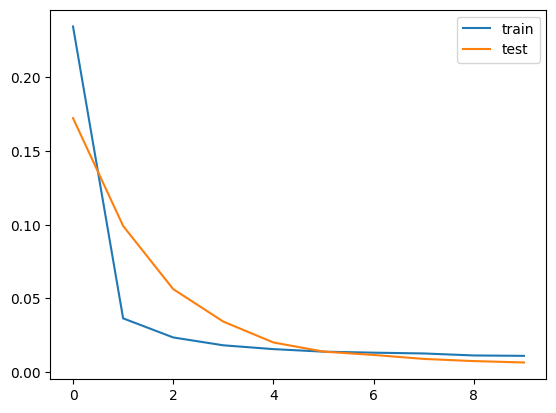

In [ ]:
# we can visualize whether it is well trained
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# and now, we can just put the encoder model by itself
# in case we want to use all of the activation values as features
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
# or, if we just want to get the bottleneck values, we can create a smaller model, 
# with just one layer - the bottleneck layer - and then we can use
submodel = Model(model.inputs, model.get_layer("dense_9").output)  

# this is the actual feature extraction - 
# where we make prediction for the train dataset
# please note that the autoencoder requires a two dimensional array
# so we need to take one datapoint and make it into a two dimensional array
# with only one row
results = submodel.predict(np.array([X_train[0]]))

1/1 [==============================] - 0s 224ms/step


In [ ]:
# and we can print the results
results[0]

array([0.4431626 , 0.666328  , 0.35303545, 0.58710104, 0.53831935,
       0.53432935, 0.4097876 , 0.49364066, 0.46283105, 0.5973215 ,
       0.48889682, 0.3922788 , 0.29409662, 0.63821584, 0.44974047,
       0.5774651 , 0.4764887 , 0.664997  , 0.4759054 , 0.5819463 ,
       0.61928964, 0.4301479 , 0.33215094, 0.5134793 , 0.53885055,
       0.58068573, 0.38776487, 0.5001241 , 0.44434902, 0.24633543,
       0.49164888, 0.44399145, 0.49700773, 0.4427784 , 0.4464333 ,
       0.4793914 , 0.7483509 , 0.37577277, 0.64123136, 0.44304034,
       0.47218615, 0.3156848 , 0.5340314 , 0.42089692, 0.52697206,
       0.52231956, 0.49445072, 0.5589007 , 0.5693999 , 0.5585008 ,
       0.54040015, 0.45011955, 0.58411056, 0.56769466, 0.67336833,
       0.6178455 , 0.37114227, 0.4942187 , 0.28266278, 0.23704416,
       0.6749203 , 0.6098821 , 0.6061253 , 0.550039  , 0.54334766,
       0.34626645, 0.34349352, 0.56000155, 0.33529645, 0.59352285,
       0.5909982 , 0.574143  , 0.6015097 , 0.5092337 , 0.32417

## Autoencoder for the defect data

Now, let's use the autoencoder for the defect data that we used in PCA and other transformations.

In [ ]:
# read the file with data using openpyxl
import pandas as pd

# we read the data from the excel file, 
# which is the defect data from the ant 1.3 system
dfDataAnt13 = pd.read_excel('./chapter_6_dataset_numerical.xlsx', 
                            sheet_name='ant_1_3',
                            index_col=0)

In [ ]:
# let's remove the defect column, as this is the one that we could
# potentially predict
X = dfDataAnt13.drop(['Defect'], axis = 1)
y = dfDataAnt13.Defect

In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [ ]:
# now, we create the encoder part

# number of input columns
n_inputs = X.shape[1]

# the first layer - the visible one
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [ ]:
# here is the interesting part - the bottleneck
# in this example, we can use the bottleneck of three values only
# which is a very small bottleneck
n_bottleneck = 3
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
# and now, we define the decoder part
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)

In [ ]:
# we place both of these into one model
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# we train the autoencoder model
history = model.fit(X_train, X_train, 
                    epochs=100, 
                    batch_size=16, 
                    verbose=2, 
                    validation_data=(X_test,X_test))

Epoch 1/10
5/5 - 3s - loss: 0.7599 - val_loss: 0.2253 - 3s/epoch - 539ms/step
Epoch 2/10
5/5 - 0s - loss: 0.6935 - val_loss: 0.1993 - 50ms/epoch - 10ms/step
Epoch 3/10
5/5 - 0s - loss: 0.6307 - val_loss: 0.1794 - 64ms/epoch - 13ms/step
Epoch 4/10
5/5 - 0s - loss: 0.5812 - val_loss: 0.1625 - 59ms/epoch - 12ms/step
Epoch 5/10
5/5 - 0s - loss: 0.5504 - val_loss: 0.1495 - 53ms/epoch - 11ms/step
Epoch 6/10
5/5 - 0s - loss: 0.5072 - val_loss: 0.1381 - 66ms/epoch - 13ms/step
Epoch 7/10
5/5 - 0s - loss: 0.4430 - val_loss: 0.1290 - 51ms/epoch - 10ms/step
Epoch 8/10
5/5 - 0s - loss: 0.4223 - val_loss: 0.1215 - 51ms/epoch - 10ms/step
Epoch 9/10
5/5 - 0s - loss: 0.3915 - val_loss: 0.1146 - 51ms/epoch - 10ms/step
Epoch 10/10
5/5 - 0s - loss: 0.3454 - val_loss: 0.1089 - 52ms/epoch - 10ms/step


In [ ]:
# or, if we just want to get the bottleneck values, we can create a smaller model, 
# with just one layer - the bottleneck layer - and then we can use
submodel = Model(model.inputs, model.get_layer("dense_8").output)  

# this is the actual feature extraction - 
# where we make prediction for the train dataset
# please note that the autoencoder requires a two dimensional array
# so we need to take one datapoint and make it into a two dimensional array
# with only one row
results = submodel.predict(np.array([X_train[0]]))

1/1 [==============================] - 0s 92ms/step


In [ ]:
# now, we can show the bottleneck values
# which in this case is only three values as the bottleneck is three values only
results[0]

array([-0.10725223,  0.11890058,  0.27683112], dtype=float32)

## Autoencoders for image data

The example below demonstrates how autoencoders are used for image data. We train the autoencoder on a MNIST dataset and then we use that autoencoder's bottlenecks values as features. 

This code uses fragments from this tutorial: https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103

In [ ]:
# first, let's read the image data from the Keras library
from tensorflow.keras.datasets import mnist

# and load it with the pre-defined train/test splits
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# now, let's create the autoencoder

# image size is 28 pixels
n_inputs = 28

# the first layer - the visible one
visible = Input(shape=(n_inputs,n_inputs,))

# encoder level 1
e = Flatten(input_shape = (28, 28))(visible)
e = LeakyReLU()(e)
e = Dense(n_inputs*2)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [ ]:
# here is the interesting part - the bottleneck
# in this example, we can use the bottleneck of more values
# as the images have larger size than numbers and there is more of them
n_bottleneck = 32
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
# and now, we define the decoder part
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
d = Dense(n_inputs*n_inputs, activation='linear')(d)
output = Reshape((28,28))(d)

In [ ]:
# we place both of these into one model
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# we train the autoencoder model
history = model.fit(X_train, X_train, 
                    epochs=100, 
                    batch_size=16, 
                    verbose=2, 
                    validation_data=(X_test,X_test))

Epoch 1/5
3750/3750 - 20s - loss: 0.0347 - val_loss: 0.0235 - 20s/epoch - 5ms/step
Epoch 2/5
3750/3750 - 16s - loss: 0.0276 - val_loss: 0.0208 - 16s/epoch - 4ms/step
Epoch 3/5
3750/3750 - 16s - loss: 0.0256 - val_loss: 0.0192 - 16s/epoch - 4ms/step
Epoch 4/5
3750/3750 - 16s - loss: 0.0244 - val_loss: 0.0183 - 16s/epoch - 4ms/step
Epoch 5/5
3750/3750 - 16s - loss: 0.0234 - val_loss: 0.0176 - 16s/epoch - 4ms/step


In [ ]:
# or, if we just want to get the bottleneck values, we can create a smaller model, 
# with just one layer - the bottleneck layer - and then we can use
submodel = Model(model.inputs, bottleneck)  

# this is the actual feature extraction - 
# where we make prediction for the train dataset
# please note that the autoencoder requires a two dimensional array
# so we need to take one datapoint and make it into a two dimensional array
# with only one row
results = submodel.predict(np.array([X_train[0]]))

1/1 [==============================] - 0s 118ms/step


In [ ]:
# now, we can show the bottleneck values
# which in this case is only three values as the bottleneck is 32 values
results[0]

array([ 0.01007973,  2.5015569 ,  0.64754784,  0.14453518, -0.5035352 ,
        1.1378441 , -1.7372552 ,  0.43974483, -1.520951  , -0.9623947 ,
       -0.95674914,  2.1764438 , -1.4636159 , -1.4788526 , -0.152534  ,
       -0.5625833 , -1.523914  , -2.1057284 ,  2.4597573 ,  0.2810134 ,
       -2.322134  , -0.10054127,  0.6018498 , -1.4842997 ,  1.1170304 ,
        1.4924281 ,  2.3936439 , -0.88839054,  3.7095435 , -0.253755  ,
       -2.1419299 , -1.3574488 ], dtype=float32)